# Binomial PMF and CDF

The probability mass function (PMF) tells us the probability of obtaining $k$ hits out of $n$ trials.

The equation for the binomial PMF is as follows: 

$$ p(k=K) = C^{n}_{k} p^k q^{n-k} $$ 

where $p(k=K)$ is the probability of $K$ hits out of $n$ trials, $p$ is the probability of a hit on any given trial, and $q=(1-p)$, and 

$$ C^{n}_{k} = \frac{n!}{k! (n-k)!}$$

... is an expression that accounts for the fact that a even balance of hits and misses is more likely (as discussed in the lecture)

## PMF

Let's implement the equation for the PDF and compare to the results of our simulation from the previous worksheet

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme() # use pretty defaults

### Implement the equation

In [2]:
n=10 # values of n, p, k as in previous exercise
k=8
p=0.5

n_choose_k = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n-k))
prob_k = ((p)**(k)) * ((1-p)**(n-k)) * n_choose_k 
print(prob_k)

0.0439453125


Hopefully this should be roughly the same as the proportion of our 10,000 coin tosses in which k=8 (it wont exactly match, as the simulation was subject to random noise)

### Built-in function

We can also use a built-in function to give the PDF:

In [3]:
stats.binom.pmf(8,10,0.5)

0.04394531249999997

<ul><li>Can you work out how to change this to get the probability of 7 heads out of 12 coin tosses? 
    <li>What if the probability of heads is 0.75?</ul>

## CDF

The CDF or cumulative distribution function tells us the probability of obtaining <i>less than or equal to </i> $k$ hits in $n$ trials

In the simulation we worked out the proportion of trials in which k>=8 (equivalent $1-p(k<=7)$)

Let's check against the output of the built-in function

In [4]:
1 - stats.binom.cdf(7,10,0.5)

0.0546875

The proportion of trials on which $k>=8$ should be roughly the same as the proportion of our 10,000 coin tosses in which k>=8 (it wont exactly match, as the simulation was subject to random noise)

<ul>
    <li>Can you work out how to change this to get the probability of at least 9 heads out of 12 coin tosses? 
    <li>What if the probability of heads is 0.75?
</ul>

## Change nReps

How many reps do we need in our simulation to get a nice close match to the theoretical PMF?

To investigate we start by plotted the expected and obtained frequencies

### Plot it

Lets re-run our simulation of 10,000 times 10 coin tosses and plot the frequency of obtaining each value of $k$ hits.

In [5]:
nReps = 10000
k = np.empty(nReps)

for i in np.arange(len(k)): # we are going to simlulte 10,000 repeats of 10 coin tosses
    k[i] = np.random.binomial(10,0.5)

Now we can work out the predicted frequencies of each value of k given the PMF
<ul>
    <li> Calculate the probability of each value of k using the built in function <tt>stats.binom.pmf()</tt>
    <li> Multiply by the number of repeats (10,000) to obtain expected frequency
</ul>

In [6]:
p_k = stats.binom.pmf(range(11),10,0.5)
freq = p_k * nReps

Now let's plot them on the same graph:

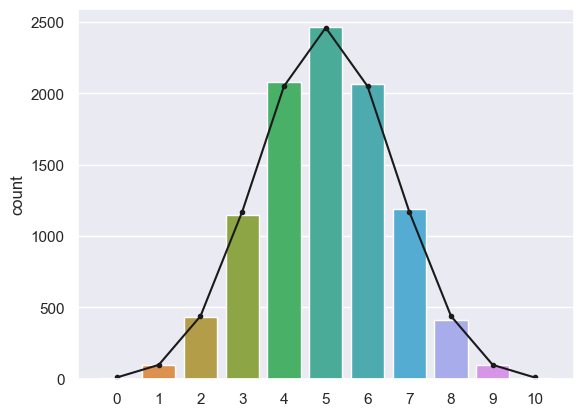

In [7]:
sns.countplot(x=k, order=range(11))
plt.plot(range(11),freq, 'k.-')

The fit is not bad!

### Change nReps

What happens if we reduce nReps?

<ul>
<li>Modify the code above to reduce nReps to, say, 1000, 100 or 50 and see if the fit is still good
<li> At some point the frequencies from the simulation start to diverge quite a bit from the predicted frequencies just due to chance
</ul>